<a href="https://colab.research.google.com/github/varunvenkatsaiis/colab_notebooks/blob/main/cnn_dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Layer

In [4]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz


--2025-03-15 09:27:36--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2025-03-15 09:27:36--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-03-15 09:27:37--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [5]:
 !wget http:/ / www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz


--2025-03-15 09:28:09--  ftp://http//
           => ‘.listing’
Resolving http (http)... failed: Name or service not known.
wget: unable to resolve host address ‘http’
/: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2025-03-15 09:28:09--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/annotations.tar.gz [following]
--2025-03-15 09:28:10--  https://thor.robots.ox.ac.uk/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘annotations.tar.gz’

annotations.tar.

In [6]:
import os

In [7]:

input_dir = "images/"

In [8]:

target_dir = "annotations/trimaps"

In [9]:

target_dir = "annotations/trimaps/"

In [10]:
!tar -xf images.tar.gz

In [11]:

!tar -xf annotations.tar.gz

In [12]:
imput_imgs = sorted(
    [os.path.join(input_dir,fname)  for fname in os.listdir(input_dir) if fname.endswith(".jpg")  ] )



In [13]:
print(imput_imgs)

['images/Abyssinian_1.jpg', 'images/Abyssinian_10.jpg', 'images/Abyssinian_100.jpg', 'images/Abyssinian_101.jpg', 'images/Abyssinian_102.jpg', 'images/Abyssinian_103.jpg', 'images/Abyssinian_104.jpg', 'images/Abyssinian_105.jpg', 'images/Abyssinian_106.jpg', 'images/Abyssinian_107.jpg', 'images/Abyssinian_108.jpg', 'images/Abyssinian_109.jpg', 'images/Abyssinian_11.jpg', 'images/Abyssinian_110.jpg', 'images/Abyssinian_111.jpg', 'images/Abyssinian_112.jpg', 'images/Abyssinian_113.jpg', 'images/Abyssinian_114.jpg', 'images/Abyssinian_115.jpg', 'images/Abyssinian_116.jpg', 'images/Abyssinian_117.jpg', 'images/Abyssinian_118.jpg', 'images/Abyssinian_119.jpg', 'images/Abyssinian_12.jpg', 'images/Abyssinian_120.jpg', 'images/Abyssinian_121.jpg', 'images/Abyssinian_122.jpg', 'images/Abyssinian_123.jpg', 'images/Abyssinian_124.jpg', 'images/Abyssinian_125.jpg', 'images/Abyssinian_126.jpg', 'images/Abyssinian_127.jpg', 'images/Abyssinian_128.jpg', 'images/Abyssinian_129.jpg', 'images/Abyssinian

In [14]:
!cd images

In [15]:
!ls

annotations  annotations.tar.gz  images  images.tar.gz	sample_data


In [16]:
cd images/

/content/images


In [17]:
!cd .

In [18]:
!cd ../

In [19]:
! cd ../

In [20]:
!cd annotations


/bin/bash: line 1: cd: annotations: No such file or directory


In [21]:
!cd /

In [22]:
cd ./

/content/images


In [23]:
cd ./

/content/images


In [24]:
cd ../

/content


In [25]:
ls


annotations/  annotations.tar.gz  images/  images.tar.gz  sample_data/


In [26]:
cd annotations/

/content/annotations


In [27]:
ls


list.txt  README  test.txt  trainval.txt  trimaps/  xmls/


In [28]:
ls

list.txt  README  test.txt  trainval.txt  trimaps/  xmls/


In [29]:
cd ../

/content


In [30]:
ls

annotations/  annotations.tar.gz  images/  images.tar.gz  sample_data/


In [31]:
target_paths = sorted(  [os.path.join(target_dir , fname )   for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")  ]  )

In [32]:
import matplotlib.pyplot as plt

In [33]:
from tensorflow.keras.utils import img_to_array , load_img

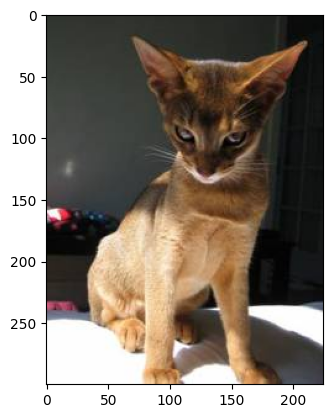

In [34]:
plt.imshow(load_img(imput_imgs[120] ))

In [35]:
def display_target(target_array):
  normalized_array = (target_array.astype("uint8") - 1) * 127
  plt.axis("off")
  plt.imshow(normalized_array[ :, :, 0])

In [36]:

img = img_to_array( load_img(target_paths[120]  ))

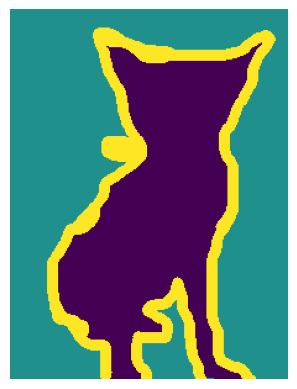

In [37]:
display_target(img)

In [38]:
import numpy as np
import random

In [39]:
img_size = (200 , 200)

In [40]:
num_imgs = len(imput_imgs)

In [41]:
def path_to_input_image(path):
  return img_to_array(load_img(path , target_size=img_size)  )

In [42]:
def path_to_target_image(path):
  img = img_to_array(
      load_img(path , target_size=img_size , color_mode="grayscale")
  )
  img = img.astype("uint8") - 1
  return img

In [43]:
random.Random(1337).shuffle(target_paths)
random.Random(1337).shuffle(imput_imgs)

In [44]:
input_imgs = np.zeros(  (num_imgs,) + img_size + (3,) , dtype="float32"  )

In [45]:
targets = np.zeros(  (num_imgs,) + img_size + (1,) , dtype="uint8" )

In [46]:
for i in range(num_imgs):
  input_imgs[i] = path_to_input_image(imput_imgs[i])
  targets[i] = path_to_target_image( target_paths[i]  )

In [47]:
num_val_samples = 1000
train_input_imgs = input_imgs[: -num_val_samples]
train_targets = targets[: -num_val_samples]


val_input_imgs = input_imgs[-num_val_samples : ]
val_targets = targets[ -num_val_samples :  ]


In [48]:
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
 def get_model( img_size , num_classes ):


  inputs = keras.Input( shape = img_size + (3,)  )

  x = layers.Rescaling( 1./ 255)(inputs)
  x = layers.Conv2D(64 , 3 , strides = 2 , activation = "relu" , padding="same" ) (x)

  x = layers.Conv2D(64, 3, activation="relu" , padding="same" ) (x)

  x = layers.Conv2D(128, 3, strides = 2 ,  activation="relu" , padding="same" ) (x)

  x = layers.Conv2D(128, 3, activation="relu" , padding="same" ) (x)

  x = layers.Conv2D(256, 3, strides = 2 ,  activation="relu" , padding="same" ) (x)

  x = layers.Conv2D(256, 3,  activation="relu" , padding="same" ) (x)

  x = layers.Conv2DTranspose( 256 , 3 , activation="relu" , padding="same" ) (x)


  x = layers.Conv2DTranspose( 256 , 3 , strides = 2 , activation="relu" , padding="same" ) (x)

  x = layers.Conv2DTranspose( 128 , 3 , activation="relu" , padding="same" ) (x)

  x = layers.Conv2DTranspose( 128 , 3 ,  strides = 2 ,  activation="relu" , padding="same" ) (x)

  x = layers.Conv2DTranspose( 64 , 3 , activation="relu" , padding="same" ) (x)

  x = layers.Conv2DTranspose( 64 , 3 , strides = 2 ,  activation="relu" , padding="same" ) (x)

  outputs = layers.Conv2D( num_classes  , 3 , activation="softmax" , padding="same"  ) (x)

  model = keras.Model( inputs , outputs  )

  return model

model = get_model( img_size=img_size , num_classes=3  )

model.summary()










Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 50, 50, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 100, 100, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 200, 200, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(  optimizer="rmsprop" , loss="sparse_categorical_crossentropy" )

In [52]:
callbacks = [

             keras.callbacks.ModelCheckpoint(  "oxford_segmentation.keras" , save_best_only=True )
]

In [ ]:
history = model.fit(
  train_input_imgs , train_targets,
  epochs = 50,
  callbacks = callbacks,
  batch_size = 64,
  validation_data = ( val_input_imgs , val_targets)
)

Epoch 1/50
 27/100 ━━━━━━━━━━━━━━━━━━━━ 55:16 45s/step - loss: 1.0275